# Pandas

Modulok importálása, az általánosan használt rövidítésekkel mint aliasokkal.

In [1]:
import pandas as pd
import numpy as np

CSV fájl beolvasása, oszlop adattípusának megadásával.

In [2]:
planets = pd.read_csv(
    'planets-moons.csv', 
    dtype={
        'name': np.str, 
        'diameter': np.int, 
        'distance': np.float, 
        'moons': np.int
    }
)

Adatok kiíratása. A `head()` és a `tail()` függvények opcionális paramétere a sorok száma.

In [3]:
planets.head(4)

,name,diameter,distance,moons
0,Mercury,4879,57.91,0
1,Venus,12104,108.20,0
2,Earth,12742,149.60,1
3,Mars,6779,227.90,2


Transzponálás

In [4]:
planets.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
name,Mercury,Venus,Earth,Mars,Ceres,Jupiter,Saturn,Uranus,Neptune,Pluto,Haumea,Makemake,Eris
diameter,4879,12104,12742,6779,950,139822,116464,50724,4495,2374,1960,1434,2326
distance,57.91,108.2,149.6,227.9,414.3,778.5,1434,2871,49244,5906.4,6459.9,6796.2,10152
moons,0,0,1,2,0,79,82,27,14,5,2,1,1


Oszlopok szerinti listázás.

In [5]:
planets[['name', 'diameter']]

,name,diameter
0,Mercury,4879
1,Venus,12104
2,Earth,12742
3,Mars,6779
4,Ceres,950
5,Jupiter,139822
6,Saturn,116464
7,Uranus,50724
8,Neptune,4495
9,Pluto,2374


Sorok és oszlopok megadása.

In [6]:
planets.iloc[0]

name        Mercury
diameter       4879
distance      57.91
moons             0
Name: 0, dtype: object

In [7]:
planets.iloc[0:2][['name', 'diameter']]

,name,diameter
0,Mercury,4879
1,Venus,12104


Szűrés 'id' oszlop alapján.

In [8]:
planets.T.loc['name']

0      Mercury
1        Venus
2        Earth
3         Mars
4        Ceres
5      Jupiter
6       Saturn
7       Uranus
8      Neptune
9        Pluto
10      Haumea
11    Makemake
12        Eris
Name: name, dtype: object

A `loc` szűrés Boolean típusú kifejezés alapján is működik.

In [9]:
planets.loc[planets['name'].isin(['Earth', 'Mars'])]

,name,diameter,distance,moons
2,Earth,12742,149.6,1
3,Mars,6779,227.9,2


Slicing

In [10]:
planets.loc[:, 'name':'distance']

,name,diameter,distance
0,Mercury,4879,57.91
1,Venus,12104,108.20
2,Earth,12742,149.60
3,Mars,6779,227.90
4,Ceres,950,414.30
5,Jupiter,139822,778.50
6,Saturn,116464,1434.00
7,Uranus,50724,2871.00
8,Neptune,4495,49244.00
9,Pluto,2374,5906.40


Egy adott cella megjelenítése

In [11]:
planets.at[3, 'diameter']

6779

Szűrés oszlop értéke alapján, az eredményeknek csak adott oszlopait megjelenítve.

In [12]:
big_planets = planets.loc[
    planets['diameter'] > 10000, 
    ['name', 'distance']
]
big_planets

,name,distance
1,Venus,108.2
2,Earth,149.6
5,Jupiter,778.5
6,Saturn,1434.0
7,Uranus,2871.0


`DataFrame` sorbarendezése adott oszlop értéke alapján. A `by` paraméter lista is lehet, ha több oszlop szerint akarunk rendezni.

In [13]:
big_planets.sort_values(by='name', ascending=True, inplace=True)
big_planets

,name,distance
2,Earth,149.6
5,Jupiter,778.5
6,Saturn,1434.0
7,Uranus,2871.0
1,Venus,108.2


Példa online API használatára a `requests` könyvtár használatával.

In [14]:
import requests

A JSON formátumú válasz `results` eleme tartalmazza az értékeket, amire szükségünk van. A Pandas `json_normalize()` függvénye alakítja át ezt táblázatos formátumra. Ezután a `to_numeric()` függvényt alkalmazzuk (`apply`) a `diameter` oszlopra, hogy megfelelő típusúra alakítsuk.

In [15]:
response = requests.get('https://swapi.dev/api/planets/')
results = response.json()['results']
sw_planets = pd.json_normalize(results)
sw_planets['diameter'] = sw_planets['diameter'].apply(pd.to_numeric)

Végül az előzővel megegyező módon szűrhetjük és jeleníthetjük meg az értékeket.

In [16]:
sw_big_planets = sw_planets.loc[sw_planets['diameter'] > 10000, ['name', 'diameter']]
sw_big_planets

,name,diameter
0,Tatooine,10465
1,Alderaan,12500
2,Yavin IV,10200
5,Bespin,118000
7,Naboo,12120
8,Coruscant,12240
9,Kamino,19720


Egyszerű és gyors diagram

<AxesSubplot:xlabel='name'>

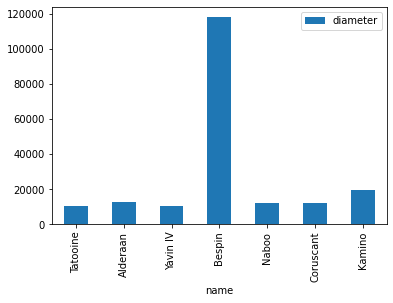

In [17]:
sw_big_planets.plot.bar(x='name', y='diameter')